In [3]:
#Introduction to CNN

In [4]:
#get the data
import zipfile

#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [5]:
#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()
#images are from the Food101 dataset in Kaggle
#but we are using only 2 classe : pizza and steak!

In [6]:
#inspect the data

!ls pizza_steak


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!ls pizza_steak/train

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
!ls pizza_steak/train/steak


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
import os

#list number of files

for dirpath, dirname, filename in os.walk('pizza_steak'):
    print(f"There are {len(dirname)} directories and {len(filename)} images in  '{dirpath}'.")


There are 2 directories and 0 images in  'pizza_steak'.
There are 2 directories and 0 images in  'pizza_steak\test'.
There are 0 directories and 250 images in  'pizza_steak\test\pizza'.
There are 0 directories and 250 images in  'pizza_steak\test\steak'.
There are 2 directories and 0 images in  'pizza_steak\train'.
There are 0 directories and 750 images in  'pizza_steak\train\pizza'.
There are 0 directories and 750 images in  'pizza_steak\train\steak'.


In [10]:
#so like total of 1000 images
#another way to get number of images

len(os.listdir("pizza_steak/train/steak"))

750

In [11]:
#lets visualizeee

#get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    target_folder = target_dir + target_class
    
    #get the random image path
    random_image = random.sample(os.listdir(target_folder),1)
    
    #read in the image
    
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}") #show the image shape (width height and color channels)
    
    return img

Image shape: (512, 512, 3)


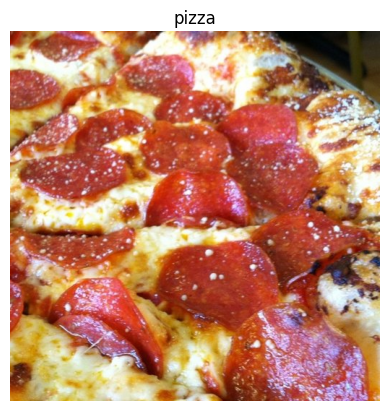

In [13]:
#view a random image from training dataset
img = view_random_image(target_class="pizza",target_dir="pizza_steak/test/")

In [14]:
import tensorflow as tf

In [15]:
#get all pixel values btw 0 and 1 (normalisation)
img/255.

array([[[0.47843137, 0.19215686, 0.1254902 ],
        [0.55686275, 0.27058824, 0.19607843],
        [0.61176471, 0.33333333, 0.25490196],
        ...,
        [0.14509804, 0.14117647, 0.12156863],
        [0.14509804, 0.14117647, 0.12156863],
        [0.14509804, 0.14117647, 0.12156863]],

       [[0.4745098 , 0.17647059, 0.11372549],
        [0.56078431, 0.26666667, 0.19215686],
        [0.60784314, 0.3254902 , 0.23921569],
        ...,
        [0.14901961, 0.14509804, 0.1254902 ],
        [0.14509804, 0.14117647, 0.12156863],
        [0.14509804, 0.14117647, 0.12156863]],

       [[0.47843137, 0.16862745, 0.10196078],
        [0.56078431, 0.25098039, 0.18431373],
        [0.6       , 0.29411765, 0.21568627],
        ...,
        [0.14901961, 0.14901961, 0.11764706],
        [0.14901961, 0.14901961, 0.11764706],
        [0.14509804, 0.14509804, 0.11372549]],

       ...,

       [[0.81568627, 0.54901961, 0.12941176],
        [0.81960784, 0.55294118, 0.1254902 ],
        [0.81568627, 0

In [16]:
img.shape

(512, 512, 3)

In [17]:
#find patterns in our images

#load images
#preprocess
#build a CNN 
#compile our CNN
#fit the CNN to training data

In [18]:
# we are building our model based on TinyVGG

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data (get all pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to data dirs
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)

#build CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile our CNN

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#len(train_data) == 47 as 1500 images / 32  = 47 batches in the training data set

#fit the model
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 32s 417ms/step - loss: 0.5803 - accuracy: 0.6867 - val_loss: 0.4712 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 7s 153ms/step - loss: 0.4286 - accuracy: 0.8027 - val_loss: 0.3433 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 7s 139ms/step - loss: 0.3926 - accuracy: 0.8320 - val_loss: 0.3682 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 7s 147ms/step - loss: 0.3699 - accuracy: 0.8413 - val_loss: 0.4181 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 7s 144ms/step - loss: 0.3013 - accuracy: 0.8760 - val_loss: 0.4117 - val_accuracy: 0.8260


In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [20]:
#using the same model as before

#setting seed
tf.random.set_seed(42)

#making the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])


#compiling the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fitting the model
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 132ms/step - loss: 1.0086 - accuracy: 0.6807 - val_loss: 0.4632 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.5277 - accuracy: 0.7700 - val_loss: 0.5368 - val_accuracy: 0.7260
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.5827 - accuracy: 0.7433 - val_loss: 0.5053 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.6230 - accuracy: 0.7493 - val_loss: 0.7842 - val_accuracy: 0.6600
Epoch 5/5
47/47 [==============================] - 7s 148ms/step - loss: 0.5565 - accuracy: 0.7600 - val_loss: 0.9045 - val_accuracy: 0.6740


In [21]:
#accuracy isnt that great the CNN had a better accuracy
#lets try again
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 122ms/step - loss: 2.8428 - accuracy: 0.6333 - val_loss: 1.3358 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 1.2977 - accuracy: 0.6907 - val_loss: 0.8103 - val_accuracy: 0.7380
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 1.2656 - accuracy: 0.6820 - val_loss: 1.1276 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 6s 117ms/step - loss: 1.0284 - accuracy: 0.7173 - val_loss: 0.6529 - val_accuracy: 0.7440
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6726 - accuracy: 0.7467 - val_loss: 0.5006 - val_accuracy: 0.7680


In [22]:
#accuracy of 52 percent is just bogus, however, we got an accuracy of 73 percent in our validation data
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [23]:
#yes model 3 has 600,000 trainable params and model 1 had like 30,000  still it struggled so badly
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [24]:
#bruhhhhh 15 million trainable parameters?!

<h2>Binary Classification</h2>

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


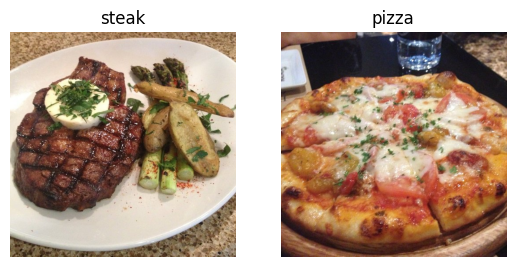

In [25]:
#BINARY CLASSIFICATION


#MODEL 1 was a CNN with 31,000 params. Although small in number, they were enough to get that 80 percent + accuracy

#lets break it down!

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image(target_class="steak", target_dir="pizza_steak/train/")
plt.subplot(1,2,2)
pizza_img = view_random_image(target_class="pizza", target_dir="pizza_steak/train/")

<h2>Preprocess the Data</h2>

In [26]:
#PREPROCESS THE DATA

#train and test dataset
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#next step is to turn our data into batches, which will help the CPU to process the images faster as its taking in bulk and not one by one
#ideally batch size 32 is best

#create train and test data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory
                                               target_size=(224,224), #target size (height, width)
                                               class_mode="binary", #type of data
                                               batch_size=32) #size of mini batches


test_data = test_datagen.flow_from_directory(directory=test_dir, 
                                               target_size=(224,224), 
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
#getting sample of train data batch (32)
images, labels = train_data.next() #next data set "batch"
len(images), len(labels)

(32, 32)

In [28]:
#batches?
len(train_data) #ie 1500/32 is approx 47

47

In [29]:
#getting the first 2 images of first batch and the shape
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [30]:
#view the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

<h2>Create a Model</h2>

In [31]:
#CREATE A MODEL

#BASELINE: simple starting model
 
#making the creating of model a bit easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
#create the model 
model_4 = Sequential([
    Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",activation="relu",input_shape=(224,224,3)), #input layer so specify input shape
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid"), #output layer (binary classification so 1 output neuron)
])
#note: strides and kernel can also be passed as a tuple (3,3) since they are square values
#if padding is "same" input shape = output shape if not, its valid and the output gets compressed
#filter is the number of sliding windows going across an input (higher = more complex)
#kernel size is size of sliding window
#stride is size of step the sliding window takes across an input

<h2>Compile the model</h2>

In [33]:
#compile
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"]) 

In [34]:
#whats going on
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


<h2>Fit the model</h2>

In [35]:
#lengths of train and test dataset
len(train_data), len(test_data) #batches

(47, 16)

In [36]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 128ms/step - loss: 1.0535 - accuracy: 0.6453 - val_loss: 0.5141 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4946 - accuracy: 0.7720 - val_loss: 0.4275 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.3657 - accuracy: 0.8373 - val_loss: 0.3692 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.2156 - accuracy: 0.9273 - val_loss: 0.4521 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.1248 - accuracy: 0.9620 - val_loss: 0.3698 - val_accuracy: 0.8400


In [37]:
#well our baseline model gave an accuracy of 93 percent and validation accuracy of 81 percent
#its impressive

<h2>Evaluate a model</h2>

<Axes: >

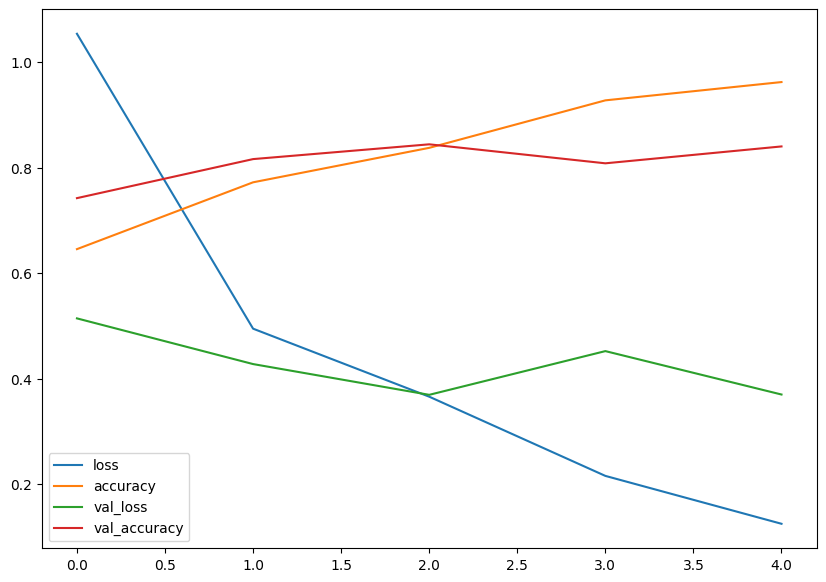

In [38]:
#lets plot the training curve 
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [39]:
#plotting the loss curve and the accuracy curve separately:
def plot_loss_curves(history):
    """
    Plots the loss and accuracy curves separately
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"])) #number of epochs just get the length
    
    #plot loss
    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("Losses")
    plt.xlabel("Epochs")
    plt.legend()
    
    #plot accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend();

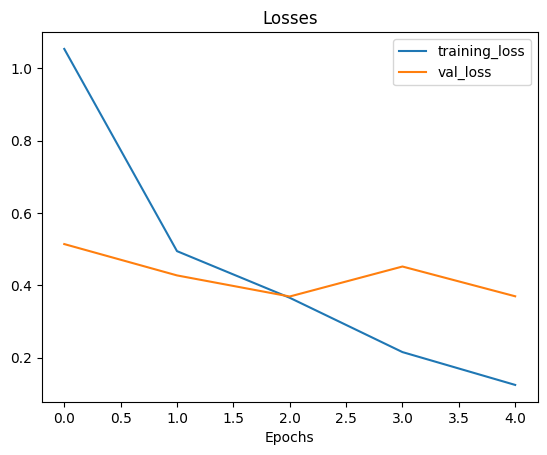

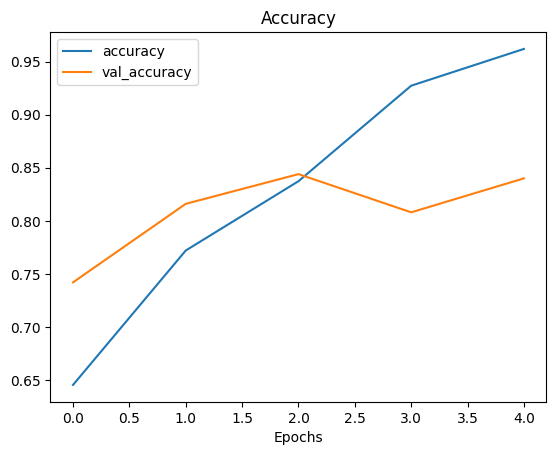

In [40]:
#lets try the fxn for history 4
plot_loss_curves(history_4)

In [41]:
#i guess our model is overfitting as in the val_loss its increasing, it should decrease right?
#also check the val_accuracy its decreasing

<h2>Adjusting the model parameters</h2>

In [42]:
"""
    Fitting a model comes in 3 steps:
        0. Create a baseline
        1. Beat the baseline
        2. Reduce overfitting

    Ways to induce overfitting
        0. Increase the number of conv layers
        1. Increase the number of conv filters
        2. Add another dense layer to the output of flattened layer
    
    Ways to reduce overfitting (regularisation)
        0. Add data augmentation
        1. Add regularisation layers (such as MaxPool2D)
        2. Add more data
"""

#Lets create the model!

#our new baseline

model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data, steps_per_epoch=len(train_data),validation_data=test_data, validation_steps=len(test_data),epochs=5)

Epoch 1/5
47/47 [==============================] - 7s 125ms/step - loss: 0.6216 - accuracy: 0.6693 - val_loss: 0.4713 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4740 - accuracy: 0.7953 - val_loss: 0.3791 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 7s 139ms/step - loss: 0.4261 - accuracy: 0.8147 - val_loss: 0.3560 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3907 - accuracy: 0.8153 - val_loss: 0.3190 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 6s 125ms/step - loss: 0.3719 - accuracy: 0.8387 - val_loss: 0.3174 - val_accuracy: 0.8640


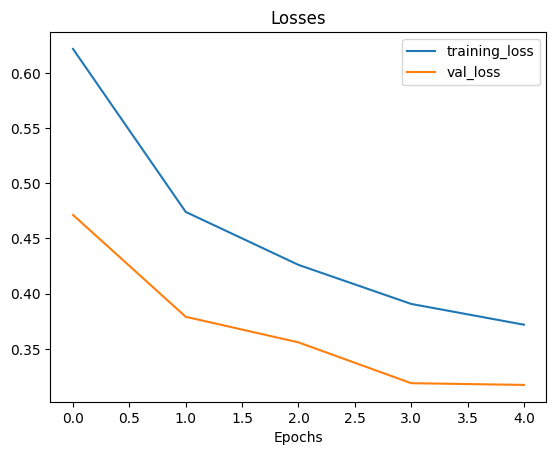

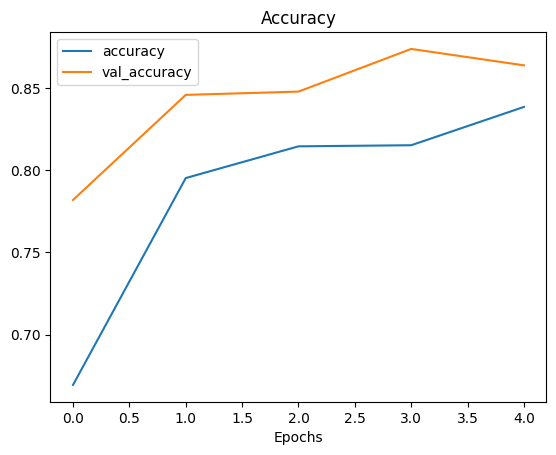

In [43]:
#yooo we got val_accuracy of 87 percent crazy, lets visualize
plot_loss_curves(history_5)

In [44]:
#both look similar, thats what we wanted, now lets look at the summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [45]:
"""
    Max Pool Layer just halved the features of the layer, ie it considered only those features which it considered important and left the remaining

    We had 400,000 + params in model_4 but only 8000 + params in model_5, still model_5 is better performing!    
"""

'\n    Max Pool Layer just halved the features of the layer, ie it considered only those features which it considered important and left the remaining\n\n    We had 400,000 + params in model_4 but only 8000 + params in model_5, still model_5 is better performing!    \n'

<h2>Data Augmentation</h2>

In [46]:
#Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip = True)

#Creating ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

#Create ImageDataGenerator test instance without data augmentaion
test_datagen = ImageDataGenerator(rescale=1/255.)

In [47]:
"""
    Data Augmentation is the process of altering our trainable dataset (increasing the diversity of our dataset)  so that it becomes more favorable to be learnt by our model
    
    
    Lets Write some Code!
"""
#import data and augment it from training directory

print("Augemented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                   batch_size=32, 
                                                                   target_size=(224,224),
                                                                   class_mode='binary',
                                                                   shuffle=False) #for demonstation only

#import non aug training data 
print("Not augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False) #for demo only

#import non aug test data
print("Not augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

#Data aug is usualyy performed only on the training data

Augemented training data:
Found 1500 images belonging to 2 classes.
Not augmented training data
Found 1500 images belonging to 2 classes.
Not augmented test data
Found 500 images belonging to 2 classes.


In [48]:
#get sample data batches
images, labels = train_data.next()

augmented_images, augmented_labels = train_data_augmented.next() #note: labels are not augmented, its only the data

Showing image number: 13


(-0.5, 223.5, 223.5, -0.5)

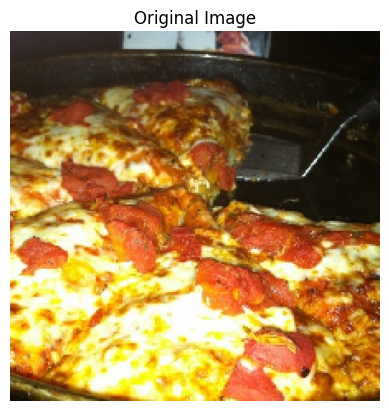

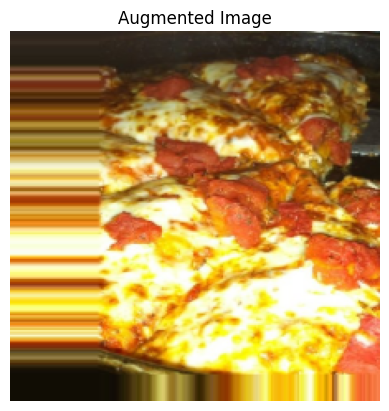

In [49]:
#show the augmented and original images
import random
random_number = random.randint(0,31) #batch sizes are 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

In [50]:
#Model that trains on augmented data

model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid") #sigmoid as we are making a binary classification model if multiple then its softmax
])

#compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit the model using augmented data
history_6 = model_6.fit(train_data_augmented,
                        steps_per_epoch = len(train_data_augmented),
                        epochs = 5,
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        )

Epoch 1/5
47/47 [==============================] - 15s 309ms/step - loss: 0.7067 - accuracy: 0.4960 - val_loss: 0.6921 - val_accuracy: 0.5380
Epoch 2/5
47/47 [==============================] - 14s 300ms/step - loss: 0.7030 - accuracy: 0.4780 - val_loss: 0.6887 - val_accuracy: 0.6080
Epoch 3/5
47/47 [==============================] - 15s 310ms/step - loss: 0.6938 - accuracy: 0.5140 - val_loss: 0.6888 - val_accuracy: 0.6280
Epoch 4/5
47/47 [==============================] - 15s 321ms/step - loss: 0.6923 - accuracy: 0.5153 - val_loss: 0.6743 - val_accuracy: 0.6180
Epoch 5/5
47/47 [==============================] - 15s 328ms/step - loss: 0.6969 - accuracy: 0.5773 - val_loss: 0.6801 - val_accuracy: 0.6720


In [51]:
"""
Above code takes a lot of time, last model it took around 6 seconds and this one it took 14 its more than double!
The reason for this is that the augmentation of the images happens on the go and it takes a bit of time
Also, just see that the accuracy isnt good either...its meh.
"""

'\nAbove code takes a lot of time, last model it took around 6 seconds and this one it took 14 its more than double!\nThe reason for this is that the augmentation of the images happens on the go and it takes a bit of time\nAlso, just see that the accuracy isnt good either...its meh.\n'

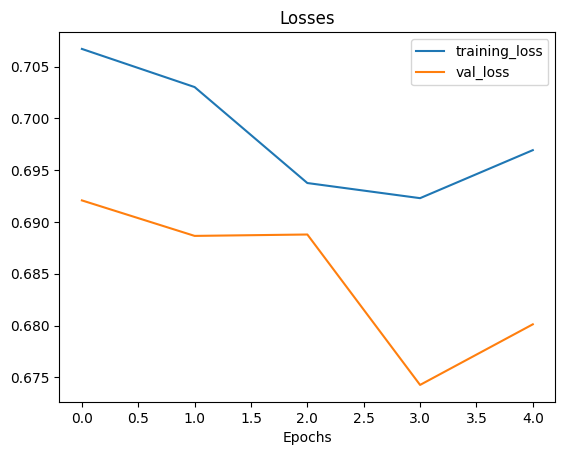

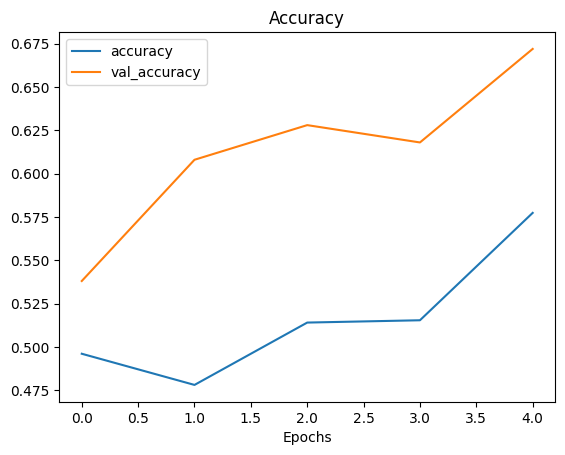

In [52]:
#Check our models training curves
plot_loss_curves(history_6)

In [53]:
"""
We will be trying making the model again but this time we will do shuffling, which we had missed last time while creating a new train augmented dataset.
"""

'\nWe will be trying making the model again but this time we will do shuffling, which we had missed last time while creating a new train augmented dataset.\n'

In [54]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                batch_size = 32,
                                                                shuffle = True, #shuffling this time!
                                                                target_size = (224,224),
                                                                class_mode="binary")

Found 1500 images belonging to 2 classes.


In [55]:
#Creating the model 7

model_7 = Sequential([
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                metrics = ["accuracy"],
                optimizer = Adam())

history_7 = model_7.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 307ms/step - loss: 0.6695 - accuracy: 0.6113 - val_loss: 0.5471 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 14s 303ms/step - loss: 0.5739 - accuracy: 0.7233 - val_loss: 0.4866 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 15s 318ms/step - loss: 0.5432 - accuracy: 0.7393 - val_loss: 0.4447 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 15s 307ms/step - loss: 0.5460 - accuracy: 0.7393 - val_loss: 0.4014 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 14s 305ms/step - loss: 0.5329 - accuracy: 0.7447 - val_loss: 0.4245 - val_accuracy: 0.8440


In [56]:
"""
So as we can see this one is much better, simply when we added shuffling!
Accuracy of 76 percent!
"""

'\nSo as we can see this one is much better, simply when we added shuffling!\nAccuracy of 76 percent!\n'

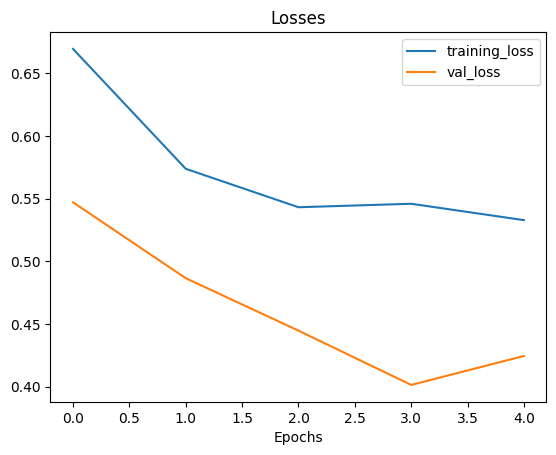

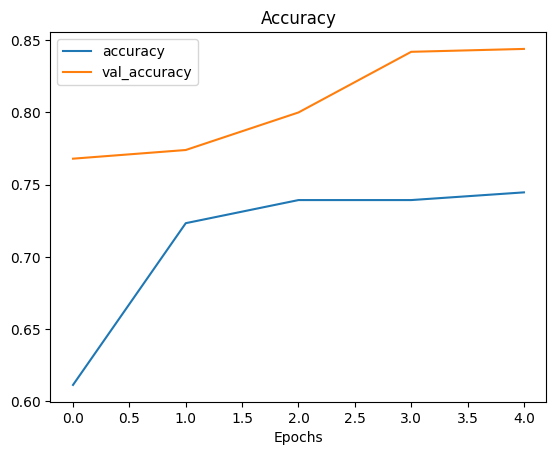

In [57]:
plot_loss_curves(history_7)

In [58]:
"Shuffling increases our model's accuracy as it is learning on random images of pizza and steak and not just pizza then steak"

"Shuffling increases our model's accuracy as it is learning on random images of pizza and steak and not just pizza then steak"

In [59]:
#Repeat until satisfied!

"""
1. Increase the number of model layers (add more Conv2D or MaxPool2D layers)
2. Increase the number of filters in each layer (10 to 32 or 64)
3. Train for longer
4. Find the ideal learning rate
5. USE TRANSFER LEARNING (DONE IN LATER MODULE)
"""

"""
Points 1 to 4 are referred to as HYPERPARAMETER TUNING
"""

'\nPoints 1 to 4 are referred to as HYPERPARAMETER TUNING\n'

In [60]:
#we will be making another model 8 as same as model 1 based on the TinyVGG architecture

model_8 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),

    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),

    Flatten(),
    Dense(1,activation = "sigmoid")
])

model_8.compile(
    loss = "binary_crossentropy",
    metrics = ["accuracy"],
    optimizer = Adam(),
)

history_8 = model_8.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))


Epoch 1/5
47/47 [==============================] - 15s 309ms/step - loss: 0.6716 - accuracy: 0.5873 - val_loss: 0.5107 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 14s 301ms/step - loss: 0.5477 - accuracy: 0.7340 - val_loss: 0.5069 - val_accuracy: 0.7040
Epoch 3/5
47/47 [==============================] - 14s 300ms/step - loss: 0.4975 - accuracy: 0.7613 - val_loss: 0.3507 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 14s 302ms/step - loss: 0.4764 - accuracy: 0.7860 - val_loss: 0.3319 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 14s 301ms/step - loss: 0.4380 - accuracy: 0.7973 - val_loss: 0.2981 - val_accuracy: 0.8860


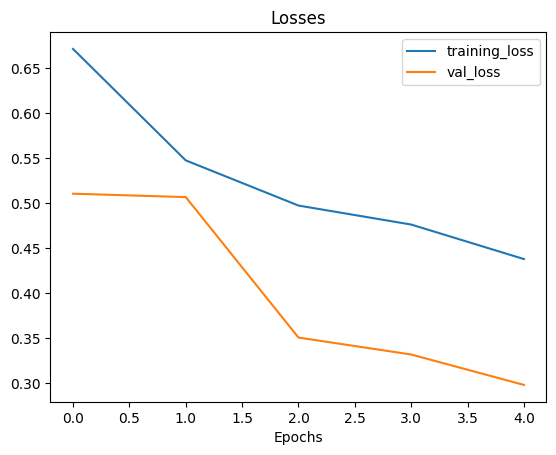

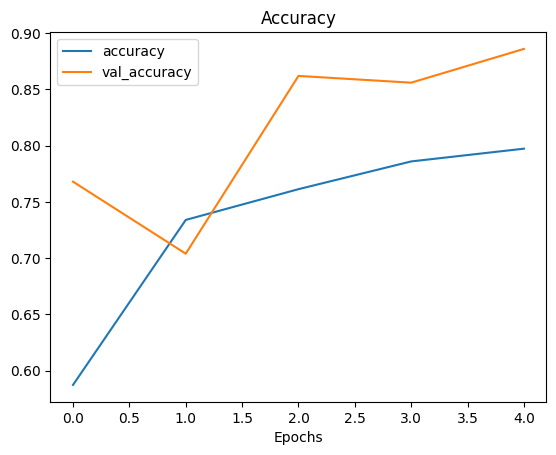

In [61]:
plot_loss_curves(history_8)

In [99]:
#lets train for longer and add more filters
model_9 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size = 2),

    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),

    Flatten(),
    Dense(1,activation = "sigmoid")
])

model_9.compile(
    loss = "binary_crossentropy",
    metrics = ["accuracy"],
    optimizer = Adam(),
)

history_9 = model_9.fit(train_data_augmented,
            epochs = 20,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data))


Epoch 1/20
47/47 [==============================] - 16s 319ms/step - loss: 0.6423 - accuracy: 0.6333 - val_loss: 0.4662 - val_accuracy: 0.8140
Epoch 2/20
47/47 [==============================] - 14s 298ms/step - loss: 0.5658 - accuracy: 0.7167 - val_loss: 0.4246 - val_accuracy: 0.8400
Epoch 3/20
47/47 [==============================] - 14s 287ms/step - loss: 0.5559 - accuracy: 0.7287 - val_loss: 0.4761 - val_accuracy: 0.7720
Epoch 4/20
47/47 [==============================] - 14s 290ms/step - loss: 0.5180 - accuracy: 0.7560 - val_loss: 0.3606 - val_accuracy: 0.8460
Epoch 5/20
47/47 [==============================] - 14s 290ms/step - loss: 0.5154 - accuracy: 0.7573 - val_loss: 0.3577 - val_accuracy: 0.8600
Epoch 6/20
47/47 [==============================] - 14s 293ms/step - loss: 0.4714 - accuracy: 0.7853 - val_loss: 0.4137 - val_accuracy: 0.8140
Epoch 7/20
47/47 [==============================] - 14s 289ms/step - loss: 0.4603 - accuracy: 0.7853 - val_loss: 0.4510 - val_accuracy: 0.8120

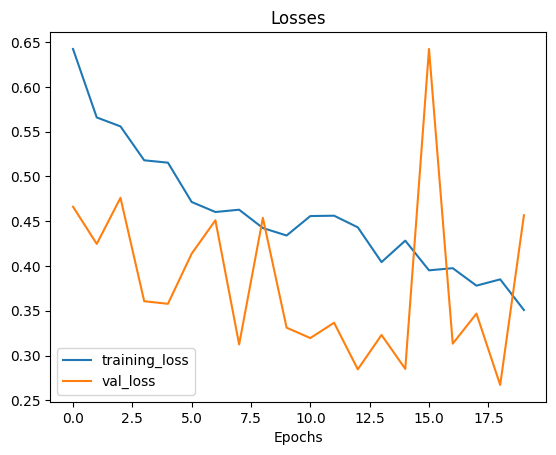

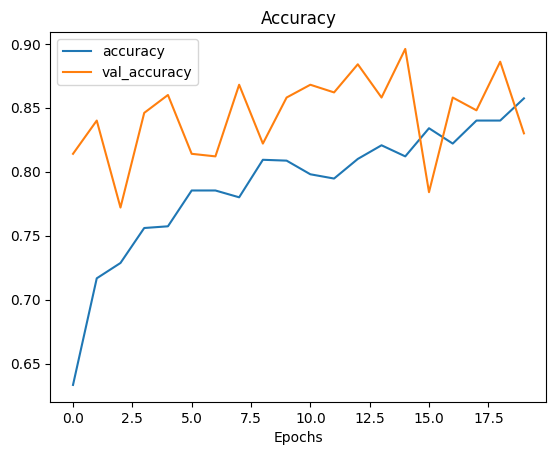

In [101]:
plot_loss_curves(history_9)

MAKING PREDICTIONS!

In [65]:
#our classses
print(class_names)

['pizza' 'steak']


In [66]:
#View our sample image
!python -m wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


Saved under 03-steak (1).jpeg


(-0.5, 3023.5, 4031.5, -0.5)

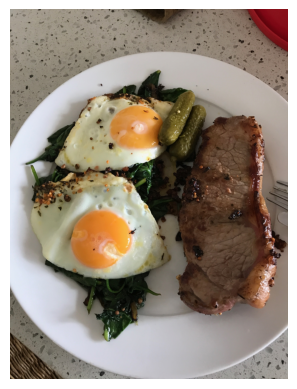

In [67]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [68]:
steak.shape

(4032, 3024, 3)

In [69]:
#pretty large image we need to reshape it to 224,224 before prediction otherwise it will raise an error
#model_9.predict(steak)

"""ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 3024, 3)"""

ValueError: in user code:

    File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 3024, 3)


In [143]:
"see as expected!"

"""
Its always important to preprocess the new data to make it same as the data in which the model was originally trained on.
"""

def load_and_prep(filename, img_shape = 224):
    "Gets and image and rescales it into (224,224,3) by default"

    img = tf.io.read_file(filename)

    #decode the image
    img = tf.image.decode_image(img,channels = 3)

    #change dtype
    # img = tf.image.convert_image_dtype(img, dtype=tf.float32)

    #resize the image
    img = tf.image.resize(img, [img_shape,img_shape])

    #rescale (get all values between 0 and 1) or normalize
    img = img/255.
    
    return img

In [71]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [144]:
steak_preprocessed = load_and_prep("03-steak.jpeg")
steak_preprocessed

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [145]:
pred = model_7.predict(
    tf.expand_dims(steak_preprocessed, axis=0)
)

1/1 [==============================] - 0s 25ms/step


In [132]:
"since its a binary classification problem, the prediction probability of <0.5 means class 0 ie pizza and > 0.5 means class 1 ie steak"
pred

array([[0.8792403]], dtype=float32)

In [133]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [134]:
pred_class = class_names[int(tf.round(pred))]
pred_class 

'steak'

In [ ]:
"Successfully predicted steak!"

In [146]:
def pred_and_plot(model, filename, class_name=class_names):

    #import the image
    img = load_and_prep(filename)

    pred = model.predict(tf.expand_dims(img, axis = 0))

    pred_class = class_name[int(tf.round(pred))]
    
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)


1/1 [==============================] - 0s 23ms/step


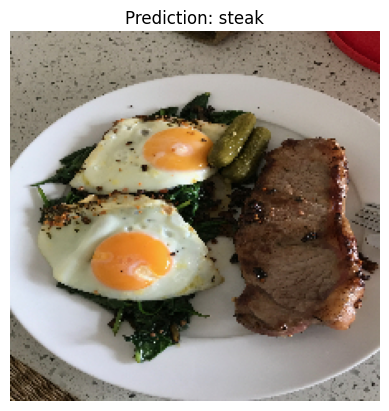

In [147]:
pred_and_plot(model_7, "03-steak.jpeg")


Saved under 03-pizza-dad.jpeg
1/1 [==============================] - 0s 21ms/step


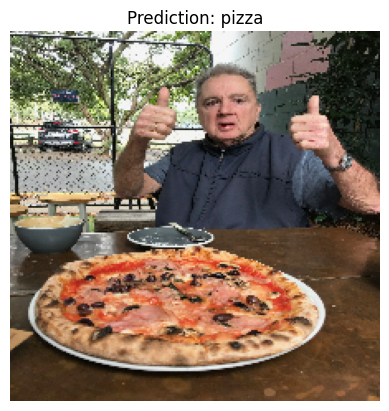

In [148]:
!python -m wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)